In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Import DataSet
company = pd.read_csv("C:\Local Disk (A);\Excelr\Assignment Excelr\\15 Random Forest Tree\Company_Data.csv")
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


# EDA

In [3]:
# Check Categorical Data (Dtype)
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
# Convert Categorical data into numerical Form
encode = LabelEncoder()

In [5]:
# Create dict which columns convert in numerical form
columns = {'ShelveLoc','Urban','US'}
for i in columns:
    company[i] = encode.fit_transform(company[i])

In [6]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [7]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int32  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int32  
 10  US           400 non-null    int32  
dtypes: float64(1), int32(3), int64(7)
memory usage: 29.8 KB


In [8]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,1.307500,53.322500,13.900000,0.705000,0.645000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,0.833475,16.200297,2.620528,0.456614,0.479113
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,0.000000,25.000000,10.000000,0.000000,0.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,1.000000,39.750000,12.000000,0.000000,0.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,2.000000,54.500000,14.000000,1.000000,1.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,2.000000,66.000000,16.000000,1.000000,1.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,2.000000,80.000000,18.000000,1.000000,1.000000


In [9]:
# Check Null values
company.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [10]:
# Correlation Between all elements
company.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,0.157470,-0.231815,-0.051955,-0.015419,0.177093
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,0.023350,-0.100239,0.025197,0.066594,0.016869
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.067678,-0.004670,-0.056855,0.037967,0.089601
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,0.008544,-0.004557,-0.033594,0.042035,0.684460
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.044772,-0.042663,-0.106378,-0.052025,0.060564
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,0.014633,-0.102177,0.011747,0.047016,0.057861
ShelveLoc,0.157470,0.023350,-0.067678,0.008544,-0.044772,0.014633,1.000000,0.056488,0.001492,-0.063978,-0.039760
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,0.056488,1.000000,0.006488,0.028479,0.008652
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.001492,0.006488,1.000000,-0.033094,-0.078250
Urban,-0.015419,0.066594,0.037967,0.042035,-0.052025,0.047016,-0.063978,0.028479,-0.033094,1.000000,0.047085


<AxesSubplot:>

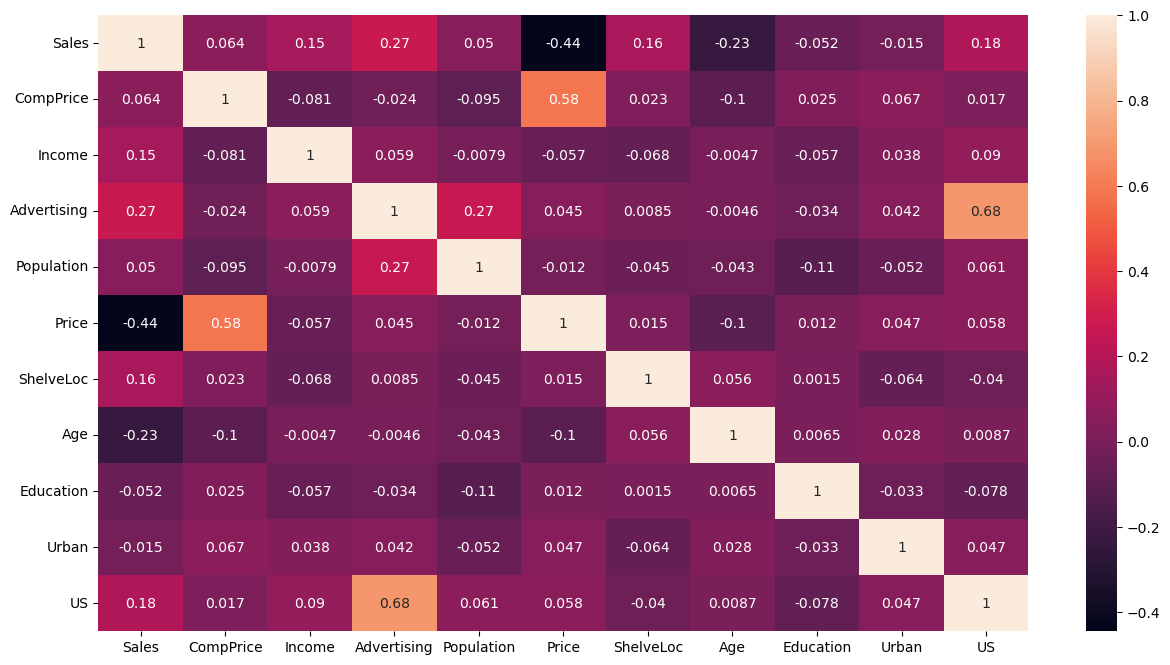

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(company.corr(), annot=True)

# Convert Sales Column into Categorical Form

In [12]:
# High and Low Sale Decided into Sales Mean
company['Sales'].mean()

7.496325

In [13]:
# Change Numerical Sales into High and Low using if else Condition
Sales_val = []
for value in company['Sales']:
    if value <= 7.49:
        Sales_val.append('Low')
    else:
        Sales_val.append('High')
company['Sales_val'] = Sales_val

In [14]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_val
0,9.50,138,73,11,276,120,0,42,17,1,1,High
1,11.22,111,48,16,260,83,1,65,10,1,1,High
2,10.06,113,35,10,269,80,2,59,12,1,1,High
3,7.40,117,100,4,466,97,2,55,14,1,1,Low
4,4.15,141,64,3,340,128,0,38,13,1,0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,High
396,6.14,139,23,3,37,120,2,55,11,0,1,Low
397,7.41,162,26,12,368,159,2,40,18,1,1,Low
398,5.94,100,79,7,284,95,0,50,12,1,1,Low


# Preprocessing

In [15]:
# Split Independent and Dependent Variable usling Slicing
X = company.iloc[:,1:11]
y = company.iloc[:,[11]]

In [16]:
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [17]:
y

,Sales_val
0,High
1,High
2,High
3,Low
4,Low
...,...
395,High
396,Low
397,Low
398,Low


In [18]:
# Split Train and test Data 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [19]:
X_train

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
250,137,105,10,435,156,1,72,14,1,1
63,119,88,10,170,101,2,61,13,1,1
312,137,117,5,337,135,0,38,10,1,1
159,119,60,0,372,70,0,30,18,0,0
283,135,110,0,112,117,2,80,16,0,0
...,...,...,...,...,...,...,...,...,...,...
323,107,105,18,428,103,2,34,12,1,1
192,108,26,0,408,93,2,56,14,0,0
117,145,53,0,507,119,2,41,12,1,0
47,126,98,0,173,108,0,55,16,1,0


In [20]:
y_train

,Sales_val
250,High
63,High
312,Low
159,High
283,Low
...,...
323,High
192,High
117,High
47,Low


In [21]:
X_test

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
132,125,87,9,232,136,1,72,10,1,1
309,131,111,13,33,80,0,68,18,1,1
341,98,120,0,268,93,2,72,10,0,0
196,130,28,6,410,133,0,72,16,1,1
246,120,56,20,266,90,0,78,18,1,1
...,...,...,...,...,...,...,...,...,...,...
146,114,83,0,412,131,0,39,14,1,0
135,96,94,14,384,120,2,36,18,0,1
390,108,75,9,61,111,2,67,12,1,1
264,128,29,5,324,159,1,31,15,1,1


In [22]:
y_test

,Sales_val
132,High
309,High
341,Low
196,Low
246,Low
...,...
146,Low
135,Low
390,Low
264,Low


# Random Forest Tree Model Building (Using Entropy Method)

In [23]:
# Model building
classifier = RandomForestClassifier(n_estimators=10 ,criterion='entropy', random_state=0)
classifier.fit(X_train,y_train)

C:\Users\aksha\AppData\Local\Temp\ipykernel_3440\287854151.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [24]:
# Prediction of test Values
y_pred = classifier.predict(X_test)
y_pred

array(['High', 'High', 'High', 'Low', 'High', 'High', 'Low', 'Low', 'Low',
       'High', 'Low', 'Low', 'Low', 'High', 'Low', 'Low', 'High', 'High',
       'Low', 'Low', 'Low', 'High', 'High', 'High', 'Low', 'High', 'Low',
       'Low', 'High', 'High', 'Low', 'High', 'High', 'High', 'Low',
       'High', 'High', 'Low', 'Low', 'High', 'High', 'High', 'High',
       'High', 'Low', 'High', 'Low', 'High', 'High', 'High', 'Low',
       'High', 'High', 'High', 'Low', 'High', 'Low', 'High', 'High',
       'Low', 'Low', 'High', 'Low', 'Low', 'High', 'Low', 'High', 'High',
       'High', 'High', 'High', 'High', 'High', 'Low', 'High', 'High',
       'Low', 'High', 'High', 'High', 'Low', 'High', 'Low', 'Low', 'Low',
       'High', 'Low', 'Low', 'High', 'High', 'Low', 'Low', 'High', 'Low',
       'High', 'Low', 'High', 'Low', 'High', 'High'], dtype=object)

In [25]:
pd.Series(y_pred).value_counts()

High    58
Low     42
dtype: int64

In [26]:
# Check Confusion Matrix Table
cm = confusion_matrix(y_test,y_pred)
cm

array([[43, 11],
       [15, 31]], dtype=int64)

In [27]:
# Check Accuracy Score
acc = accuracy_score(y_test,y_pred)
acc

0.74

In [28]:
# Classification Report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

        High       0.74      0.80      0.77        54
         Low       0.74      0.67      0.70        46

    accuracy                           0.74       100
   macro avg       0.74      0.74      0.74       100
weighted avg       0.74      0.74      0.74       100



# Random Forest Tree Model Building (Using Gini Method)

In [29]:
# Model Building
classifier1 = RandomForestClassifier(n_estimators=10, criterion='gini', random_state=0)
classifier1.fit(X_train,y_train)

C:\Users\aksha\AppData\Local\Temp\ipykernel_3440\1527732127.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier1.fit(X_train,y_train)


RandomForestClassifier(n_estimators=10, random_state=0)

In [30]:
# Prediction of test values
y_pred = classifier1.predict(X_test)
y_pred

array(['Low', 'High', 'High', 'Low', 'High', 'High', 'High', 'Low', 'Low',
       'High', 'High', 'High', 'Low', 'High', 'Low', 'Low', 'High',
       'High', 'Low', 'Low', 'Low', 'High', 'High', 'High', 'Low', 'High',
       'Low', 'Low', 'Low', 'Low', 'High', 'High', 'High', 'High', 'Low',
       'High', 'High', 'Low', 'Low', 'High', 'Low', 'High', 'Low', 'High',
       'High', 'Low', 'High', 'High', 'High', 'High', 'Low', 'High',
       'High', 'High', 'Low', 'Low', 'Low', 'High', 'Low', 'Low', 'Low',
       'High', 'Low', 'Low', 'High', 'High', 'High', 'High', 'High',
       'High', 'High', 'High', 'High', 'High', 'High', 'High', 'Low',
       'High', 'High', 'High', 'Low', 'High', 'Low', 'Low', 'High',
       'High', 'Low', 'Low', 'High', 'High', 'High', 'High', 'High',
       'Low', 'High', 'Low', 'High', 'Low', 'Low', 'High'], dtype=object)

In [31]:
pd.Series(y_pred).value_counts()

High    60
Low     40
dtype: int64

In [32]:
# Check confusion Matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[45,  9],
       [15, 31]], dtype=int64)

In [33]:
# Check Accuracy Score
acc = accuracy_score(y_test,y_pred)
acc

0.76

In [34]:
# Classification Report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

        High       0.75      0.83      0.79        54
         Low       0.78      0.67      0.72        46

    accuracy                           0.76       100
   macro avg       0.76      0.75      0.76       100
weighted avg       0.76      0.76      0.76       100

